In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pytesseract
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Loading the alphabet dataset
alphabet_data = pd.read_csv('alphabets_28x28.csv')

# Numeric
alphabet_data.iloc[:, 1:] = alphabet_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Dropna
cleaned_alphabet_data = alphabet_data.dropna()

print("Cleaned Data Shape:", cleaned_alphabet_data.shape)

In [50]:
print(cleaned_alphabet_data.head)

<bound method NDFrame.head of        label row 1 col 1 pixel row 1 col 2 pixel row 1 col 3 pixel  \
0          A               0.0               0.0               0.0   
1          A               0.0               0.0               0.0   
2          A               0.0               0.0               0.0   
3          A               0.0               0.0               0.0   
4          A               0.0               0.0               0.0   
...      ...               ...               ...               ...   
372446     Z               0.0               0.0               0.0   
372447     Z               0.0               0.0               0.0   
372448     Z               0.0               0.0               0.0   
372449     Z               0.0               0.0               0.0   
372450     Z               0.0               0.0               0.0   

       row 1 col 4 pixel  row 1 col 5 pixel  row 1 col 6 pixel  \
0                    0.0                0.0                0.0 

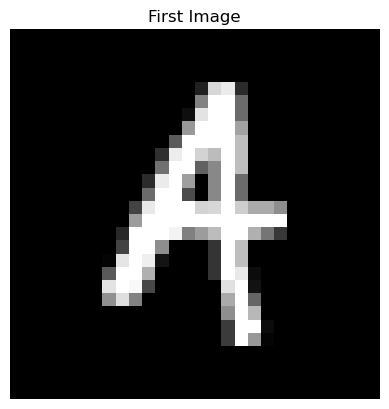

In [56]:
first_image_data = cleaned_alphabet_data.iloc[0, 1:].values.astype(np.uint8).reshape(28, 28)
plt.imshow(first_image_data, cmap='gray')
plt.axis('off')  # Disable axis
plt.title('First Image')
plt.show()

In [62]:
# OCR on Alphabets Dataset
# Used cv2 for greyscale conversion
# Used opencv's pytesseract lib for thresholding 
def ocr_image(image_data):
    # Used gpt' help here to reshape (didn't know astype concept)
    image_array = image_data.values.astype(np.uint8).reshape(28, 28)
    
    gray = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    
    # Thresholding to preprocess the image (Used online reference) 
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    line = pytesseract.image_to_string(thresh, config='--psm 10')
    
    return line.strip()



In [74]:
# Loading sentiment analysis dataset
sentiment_data = pd.read_csv('sentiment_analysis_dataset.csv')

# Spliting data
X = sentiment_data['line']
y = sentiment_data['sentiment']

print(sentiment_data.columns)

print(sentiment_data.head)


Index(['line', 'sentiment'], dtype='object')
<bound method NDFrame.head of                                                  line sentiment
0   I AM REALLY FRUSTRATED BECAUSE YOU CONSTANTLY ...     Angry
1   IT MAKES ME UPSET THAT YOU NEVER TAKE RESPONSI...     Angry
2   I CANNOT BELIEVE YOU MISSED ANOTHER DEADLINE A...     Angry
3   IT ANNOYS ME WHEN YOU INTERRUPT DURING MEETING...     Angry
4   I AM TIRED OF YOUR EXCUSES EVERY TIME SOMETHIN...     Angry
5   IT UPSETS ME THAT YOU ALWAYS ARRIVE LATE AND Y...     Angry
6   I AM REALLY ANGRY BECAUSE YOU NEVER PREPARE FO...     Angry
7   IT INFURIATES ME THAT YOU NEVER APPRECIATE THE...     Angry
8   I CANNOT STAND HOW YOU ALWAYS TALK DOWN TO PEO...     Angry
9   IT IS VERY DISAPPOINTING THAT YOU NEVER FOLLOW...     Angry
10  I AM VERY HAPPY BECAUSE YOU ALWAYS LISTEN CARE...     Happy
11  IT IS WONDERFUL HOW YOU ALWAYS COME PREPARED A...     Happy
12  I APPRECIATE HOW YOU ALWAYS OFFER TO HELP AND ...     Happy
13  IT IS FANTASTIC THAT YOU 

In [80]:
# Used scilit learn (Hope atleat that's allowed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# This initialization is for feature extraction again using scikit learn
vectorizer = TfidfVectorizer(max_features=1000)  

# Fit and transform method on the training data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print(X_train_tfidf)

(24,) (6,) (24,) (6,)
  (0, 134)	0.3101388711563481
  (0, 182)	0.2744723455645509
  (0, 148)	0.2744723455645509
  (0, 110)	0.24916654293389517
  (0, 213)	0.2744723455645509
  (0, 166)	0.24916654293389517
  (0, 113)	0.3101388711563481
  (0, 216)	0.1881942147114423
  (0, 120)	0.13896790541173318
  (0, 7)	0.17592895111597392
  (0, 171)	0.3101388711563481
  (0, 232)	0.11210516876393051
  (0, 229)	0.3101388711563481
  (0, 191)	0.2657979673082878
  (0, 17)	0.3101388711563481
  (1, 133)	0.2970596571440486
  (1, 217)	0.2970596571440486
  (1, 108)	0.23865866132722505
  (1, 161)	0.2970596571440486
  (1, 143)	0.2970596571440486
  (1, 3)	0.2628972645864337
  (1, 109)	0.2970596571440486
  (1, 55)	0.2970596571440486
  (1, 194)	0.2970596571440486
  (1, 173)	0.2970596571440486
  :	:
  (22, 5)	0.1534392213365141
  (22, 233)	0.13369321128513403
  (22, 110)	0.25065560588738917
  (22, 120)	0.1397984019833703
  (22, 7)	0.08849016668904575
  (22, 232)	0.11277512891081044
  (23, 208)	0.2995789969251101
  (23

In [94]:
# SVM
svm_classifier = SVC(kernel='linear', random_state=42)

# Training classifier
svm_classifier.fit(X_train_tfidf, y_train)

# Predict sentiment 
y_pred = svm_classifier.predict(X_test_tfidf)

print(X_test.iloc[0])
print(y_pred[0])

print(X_test.iloc[1])
print(y_pred[1])

print(X_test.iloc[2])
print(y_pred[2])

print(X_test.iloc[3])
print(y_pred[3])

YOUR EMAIL WAS CLEAR AND INFORMATIVE ADDRESSING ALL THE IMPORTANT POINTS AND PROVIDING THE NECESSARY UPDATES
Neutral
IT MAKES ME HAPPY THAT YOU ALWAYS RECOGNIZE THE EFFORTS OF OTHERS AND YOUR APPRECIATION MOTIVATES EVERYONE TO KEEP WORKING HARD
Angry
THE EVENT YESTERDAY WAS WELLORGANIZED AND THE AGENDA WAS FOLLOWED SMOOTHLY ENSURING EVERYTHING WENT ACCORDING TO PLAN
Neutral
IT IS AMAZING HOW YOU ALWAYS STAY CALM UNDER PRESSURE AND YOUR COMPOSURE HELPS EVERYONE STAY FOCUSED AND ON TRACK
Happy


In [96]:
# Performance
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Got stuck after this 
# Output of ocr image was not compatible with function which I was able to build for sentiment analysis
# It seems thresholding using that inbulit "_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)"
# changing the greyscale and normal input which used sentiment analysis is not working 
# According to me next steps would be integrating these ocr_image outputs to classifier somehow and then test them on target images 

Classification Report:
              precision    recall  f1-score   support

       Angry       0.50      0.50      0.50         2
       Happy       0.50      0.50      0.50         2
     Neutral       1.00      1.00      1.00         2

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6

Accuracy: 0.6666666666666666
